In [1]:
import numpy as np

np.random.seed(1)
 
trupe_p = 0.7 #we are taking p
data = np.random.binomial(1, trupe_p, 10)
 
print("observed coin tosses (1 = Head, 0 = Tail):")
print(data)
print("number of heads:", data.sum())


observed coin tosses (1 = Head, 0 = Tail):
[1 0 1 1 1 1 1 1 1 1]
number of heads: 9


In [2]:
#now assume coin toss follows a Bernoulli distribution , P(X=1) = p, P(X=0) = 1-p
#log likelihood function for Bernoulli distribution
def log_likelihood(p, data):
    return np.sum(data * np.log(p) + (1 - data) * np.log(1 - p))

In [3]:
import matplotlib.pyplot as plt

p_values=np.linspace(0.01, 0.99, 100)
ll_values=[log_likelihood(p, data) for p in p_values]

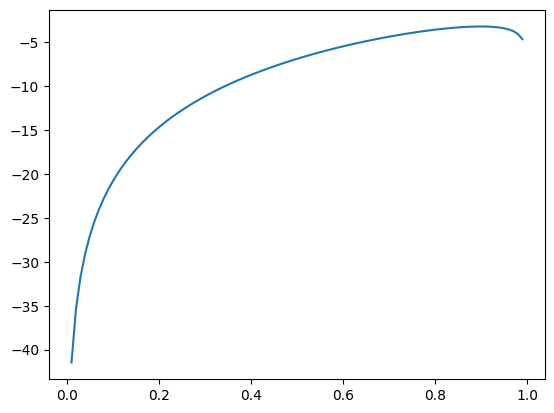

In [5]:
plt.plot(p_values, ll_values)

In [6]:
p_mle=data.mean()
print("MLE estimate for p:", p_mle)

MLE estimate for p: 0.9


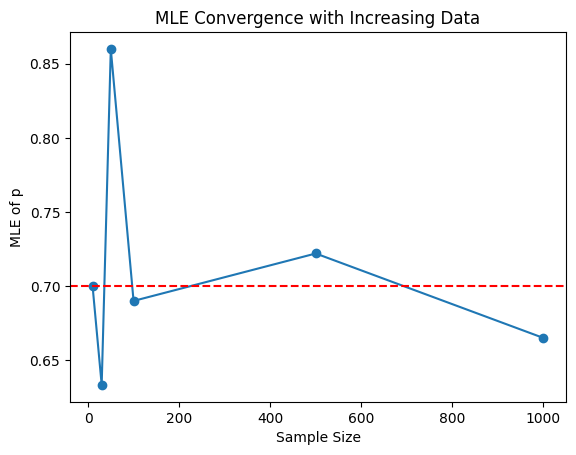

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

true_p=0.7
sample_sizes=[10,30,50,100,500,1000]
p_mle_values=[]

for n in sample_sizes:
    data=np.random.binomial(1,true_p,n)
    p_mle=data.mean()
    p_mle_values.append(p_mle)

#Plot
plt.plot(sample_sizes, p_mle_values, marker='o')
plt.axhline(true_p,color='r',linestyle='--')
plt.xlabel("Sample Size")
plt.ylabel("MLE of p")
plt.title("MLE Convergence with Increasing Data")
plt.show()

In [10]:
#Generate Normal Data (True μ, σ)
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

true_mu = 5
true_sigma = 2
n = 1000

data = np.random.normal(true_mu, true_sigma, n)

print("True mean:", true_mu)
print("True std:", true_sigma)


True mean: 5
True std: 2


In [11]:
#Estimate Mean and Std from Dataset (MLE)
mu_mle = np.mean(data)
sigma_mle = np.sqrt(np.mean((data - mu_mle) ** 2))

print("Estimated mean (MLE):", mu_mle)
print("Estimated std (MLE):", sigma_mle)


Estimated mean (MLE): 5.077624952319204
Estimated std (MLE): 1.9620082678644233


In [12]:
#Log-Likelihood Function (Normal Distribution)
def log_likelihood(mu, sigma, data):
    n = len(data)
    return -n*np.log(sigma*np.sqrt(2*np.pi)) - np.sum((data - mu)**2) / (2*sigma**2)


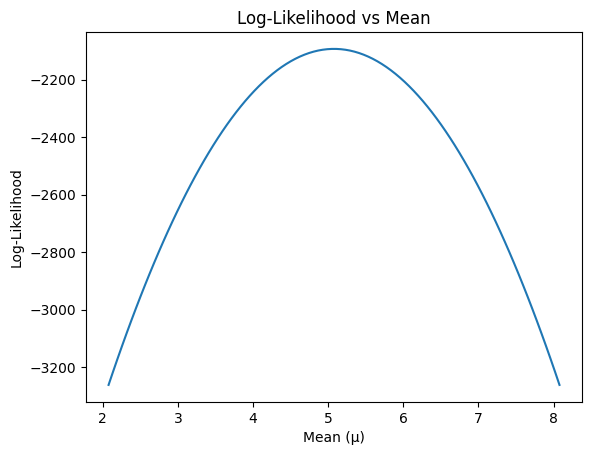

In [13]:
#Log-Likelihood vs Mean (σ fixed)
mu_values = np.linspace(mu_mle - 3, mu_mle + 3, 100)
ll_values = [log_likelihood(mu, sigma_mle, data) for mu in mu_values]

plt.plot(mu_values, ll_values)
plt.xlabel("Mean (μ)")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Mean")
plt.show()


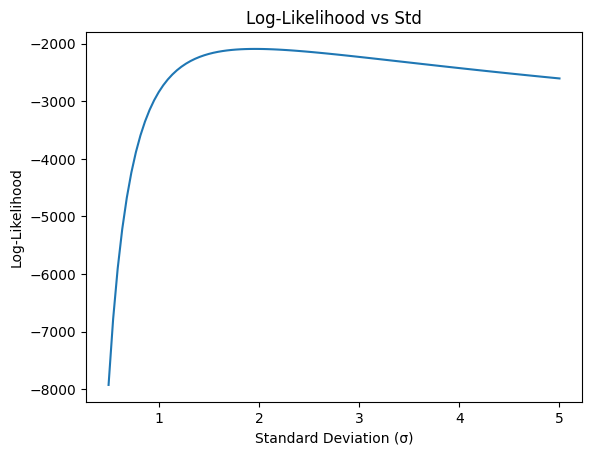

In [14]:
#og-Likelihood vs Std (μ fixed)
sigma_values = np.linspace(0.5, 5, 100)
ll_sigma = [log_likelihood(mu_mle, s, data) for s in sigma_values]

plt.plot(sigma_values, ll_sigma)
plt.xlabel("Standard Deviation (σ)")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Std")
plt.show()


In [15]:
#Checking Convergence of MLE (Increasing Sample Size)
np.random.seed(0)

sample_sizes = [10, 30, 50, 100, 500, 1000]
mu_mle_values = []
sigma_mle_values = []

for n in sample_sizes:
    data = np.random.normal(true_mu, true_sigma, n)
    mu_hat = np.mean(data)
    sigma_hat = np.sqrt(np.mean((data - mu_hat) ** 2))
    
    mu_mle_values.append(mu_hat)
    sigma_mle_values.append(sigma_hat)


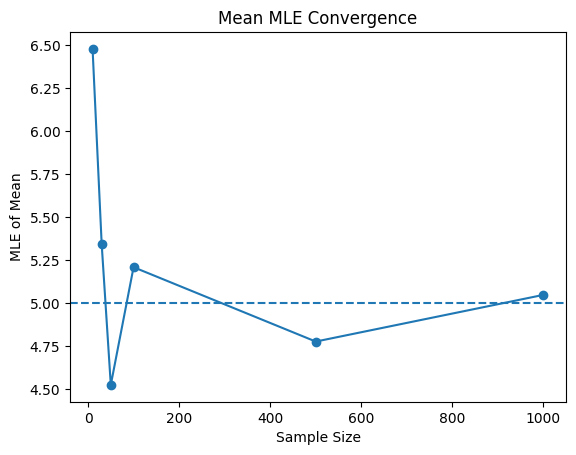

In [ ]:
# Mean Convergence
plt.plot(sample_sizes, mu_mle_values, marker='o')
plt.axhline(true_mu, linestyle='--')
plt.xlabel("Sample Size")
plt.ylabel("MLE of Mean")
plt.title("Mean MLE Convergence")
plt.show()


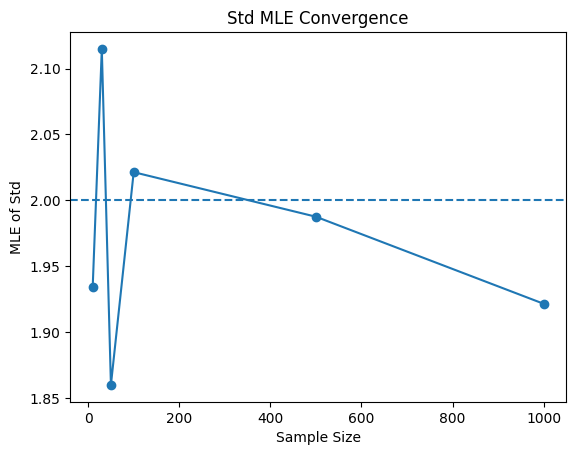

In [17]:
#Std Convergence
plt.plot(sample_sizes, sigma_mle_values, marker='o')
plt.axhline(true_sigma, linestyle='--')
plt.xlabel("Sample Size")
plt.ylabel("MLE of Std")
plt.title("Std MLE Convergence")
plt.show()
